# Bay Wheels Bike Sharing System
## by Suvarshini

## Investigation Overview

> Bay Wheels (previously known as Ford GoBike) is a regional public bicycle sharing system in California's San Francisco Bay Area. The aim of this project is to understand and learn insights of the consumer's behavior when using the bike sharing system. We are interested to know who uses this system, how long do they ride, when do they ride, and how did the rebranding affected the user's behavior.


## Dataset Overview

> We focus on the year 2019 which has 2,506,983 rows and 15 columns. Each trip (row) is anonymized and includes:
- Trip Duration (seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type (Subscriber or Customer – "Subscriber" = Member or "Customer" = Casual)
- Bike Share Trip for All (Users are recipients of certain financial assistance for low income groups- True or False)
- Rental Access Method (Users paid a ride using app or clipper - "App" = Lyft App or "Clipper" = Bay Area's all-in-one transit card (can pay for bike, trains, bus, etc.))

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('baywheels_exploration.csv')
df_clean['start_time'] = pd.to_datetime(df_clean['start_time'])
df_clean['end_time'] = pd.to_datetime(df_clean['end_time'])
df_clean['start_station_id'] = df_clean['start_station_id'].astype(str)
df_clean['end_station_id'] = df_clean['end_station_id'].astype(str)
df_clean['user_type'] = df_clean['user_type'].astype('category')

# Order the weekday columns
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
day_ord = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df_clean['day'] = df_clean['day'].astype(day_ord)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506982 entries, 0 to 2506981
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  int64         
 12  user_type                category      
 13  month                    object        
 14  hour                     int64         
 15  day                      category      
 16  duration_min             float64       
 17  duration_period          ob

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Most rides are during working hours

> Higher rentals during weekdays and at 8-9am and 5-6pm.

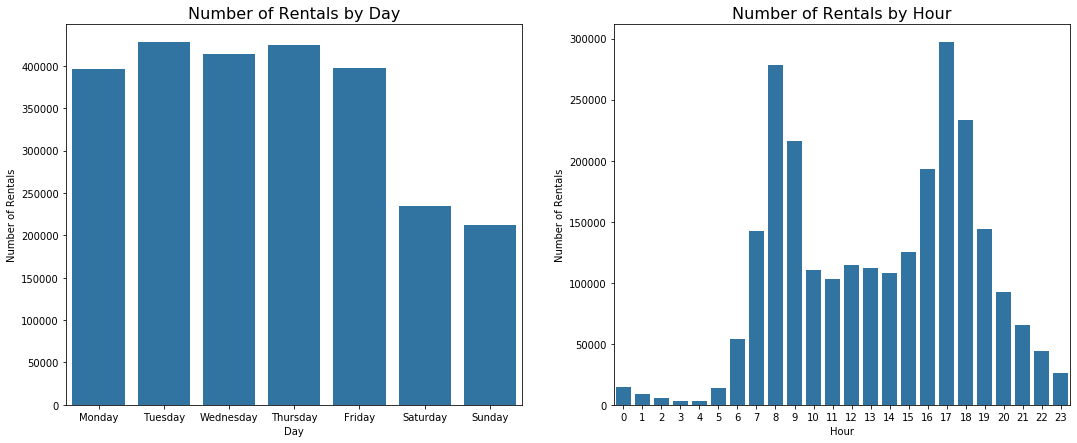

In [6]:
# Get base colour
base_color = sb.color_palette()[0]

plt.figure(figsize=(18,7))

# Plot daily rentals
plt.subplot(1,2,1)
sb.countplot(x='day', data=df_clean, color=base_color)
plt.xlabel('Day')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Day', fontsize=16)

# Plot hourly rentals
plt.subplot(1,2,2)
sb.countplot(x='hour', data=df_clean, color=base_color)
plt.xlabel('Hour')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Hour', fontsize=16);

## Most rides have short duration

> 76% of the rides are less than 15 minutes.

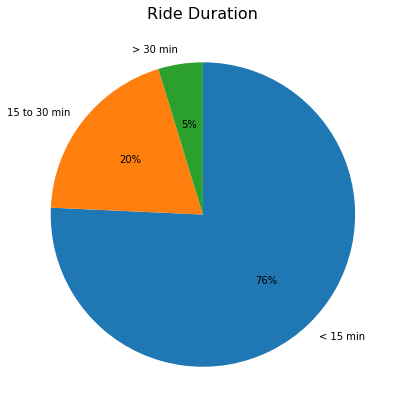

In [8]:
plt.figure(figsize=(15,7))
sorted_counts = df_clean['duration_period'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.0f%%')

plt.title('Ride Duration', fontsize=16);

## Rentals and ride duration affected by season

> More rentals and longer ride duration during hotter months. However, the number of rental was affected by the rebranding and marketing strategy by Lyft. For example, the drop in May-June was due to the rebranding, July had higher rentals due to the introduction of ebike but dropped again in August when ebikes were pulled out due to battery issues.

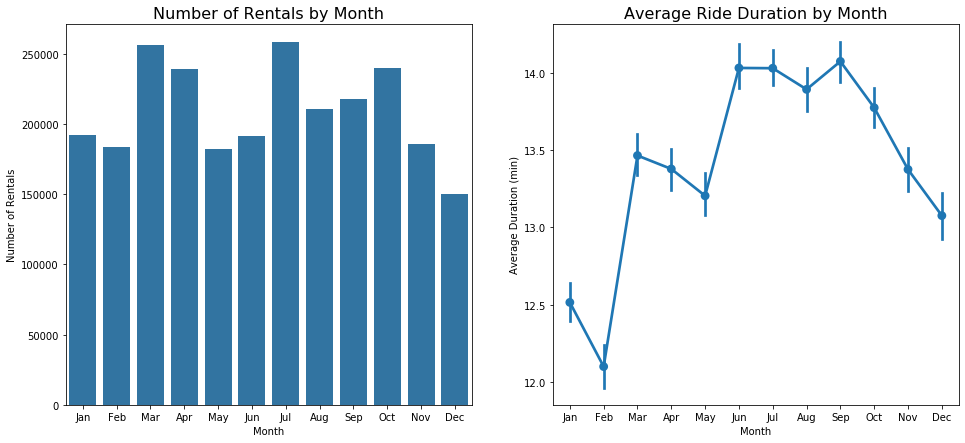

In [18]:
plt.figure(figsize=(16,7))

# Plot monthly rentals
plt.subplot(1,2,1)
sb.countplot(x='month', data=df_clean, color=base_color)
plt.xlabel('Month')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by Month', fontsize=16)

# Plot monthly ride duration
plt.subplot(1,2,2)
sb.pointplot(data=df_clean, x='month', y='duration_min', color=base_color, linestyles='-')
plt.xlabel('Month')
plt.ylabel('Average Duration (min)')
plt.title('Average Ride Duration by Month', fontsize=16);

## High number of subscribers but customers have longer ride duration

> 80.6% are subscribers but customers have longer ride duration (median 12.5 mins) than subscribers (median 8.8 mins) for rides less than 45 minutes.


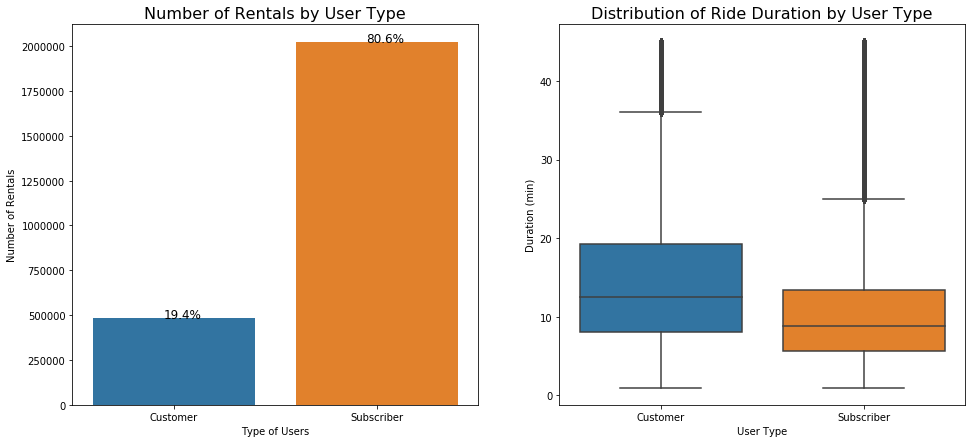

In [17]:
plt.figure(figsize=(16,7))

# Plot user count
plt.subplot(1,2,1)
ax = sb.countplot(x='user_type', data=df_clean)
plt.xlabel('Type of Users')
plt.ylabel('Number of Rentals')
plt.title('Number of Rentals by User Type', fontsize=16)

# Display percentage
total = len(df_clean['user_type'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    ax.annotate(percentage, (x, y), size = 12)

# Plot user ride duration
plt.subplot(1,2,2)
df_duration_45mins = df_clean.query('duration_min <= 45')
sb.boxplot(data=df_duration_45mins, x='user_type', y='duration_min')
plt.xlabel('User Type')
plt.ylabel('Duration (min)')
plt.title('Distribution of Ride Duration by User Type', fontsize=16);

## Customers might be transitioning to subscribers

> Customers have an unstable trend but had a sharp decrease in December while number of subscribers have increased in that month. This may be due to customers are becoming subscribers.

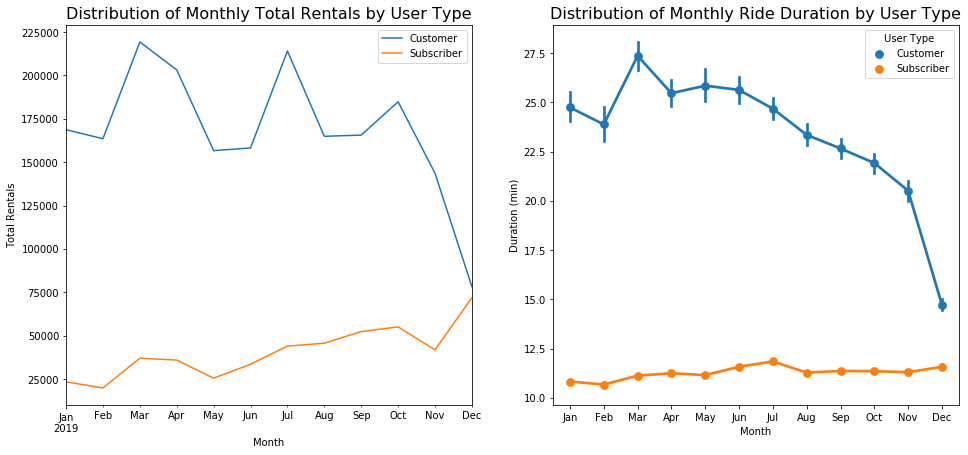

In [19]:
plt.figure(figsize=(16,7))

# Plot monthly rentals by user type
plt.subplot(1,2,1)
subscriber_rides = df_clean.query('user_type=="Subscriber"').set_index('start_time').resample('M')['duration_min'].count()
customer_rides = df_clean.query('user_type=="Customer"').set_index('start_time').resample('M')['duration_min'].count()
subscriber_rides.plot()
customer_rides.plot()
plt.xlabel('Month')
plt.ylabel('Total Rentals')
plt.title('Distribution of Monthly Total Rentals by User Type', fontsize=16)
plt.legend(['Customer', 'Subscriber'])

# Plot monthly ride duration by user type
plt.subplot(1,2,2)
sb.pointplot(data=df_clean, x='month', y='duration_min', hue='user_type', linestyles='-')
plt.xlabel('Month')
plt.ylabel('Duration (min)')
plt.title('Distribution of Monthly Ride Duration by User Type', fontsize=16)
plt.legend(title='User Type');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!